In [25]:
from utils import *

import tensorflow_datasets as tfds

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## tfds

### load and visualize

In [6]:
datasets = tfds.load(name="mnist")

In [9]:
type(datasets), datasets.keys()

(dict, dict_keys(['test', 'train']))

In [10]:
mnist_train, mnist_test = datasets["train"], datasets["test"]

> You can then apply any transformation you want (typically shuffling, batching, and prefetching), and you’re ready to train your model.

In [11]:
mnist_train = mnist_train.repeat(5).batch(32).prefetch(1)

In [17]:
mnist_batch = next(iter(mnist_train))

In [19]:
type(mnist_batch), mnist_batch.keys()

(dict, dict_keys(['image', 'label']))

In [20]:
images, labels = mnist_batch.values()

In [23]:
type(images), images.shape, labels.shape

(tensorflow.python.framework.ops.EagerTensor,
 TensorShape([32, 28, 28, 1]),
 TensorShape([32]))

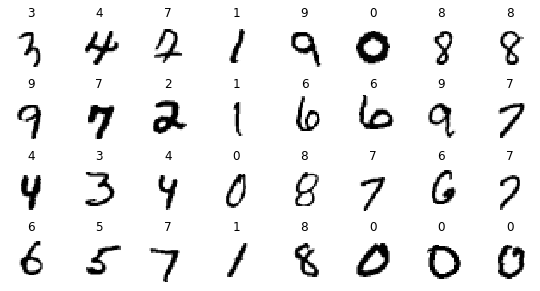

In [26]:
plot_sample(images.numpy(), labels.numpy())

> Note that each item in the dataset is a dictionary containing both the features and the labels. But Keras expects each item to be a tuple containing two elements (again, the features and the labels).

### how to load for training

So let's try to look at the structure of `mnist_dataset` and compare it with the case when we use `as_supervised=True`:

- in the first case `mnist_batch` is a dictionary (and keras expects a tuple, not dictionary);
- 

In [32]:
datasets = tfds.load(name="mnist")
mnist_train, mnist_test = datasets["train"], datasets["test"]

In [33]:
type(mnist_train)

tensorflow.python.data.ops.dataset_ops._OptionsDataset

In [34]:
mnist_batch = next(iter(mnist_train))

In [36]:
type(mnist_batch), mnist_batch.keys()

(dict, dict_keys(['image', 'label']))

In [38]:
type(mnist_batch['image']), mnist_batch['image'].shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([28, 28, 1]))

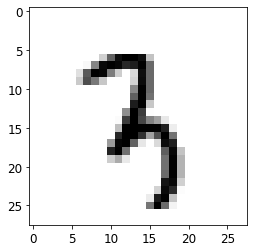

In [40]:
plt.imshow(mnist_batch['image'].numpy().reshape(28, 28), cmap='binary')

In [41]:
type(mnist_batch['label']), mnist_batch['label'].shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([]))

In [42]:
mnist_batch['label']

<tf.Tensor: id=141633, shape=(), dtype=int64, numpy=3>

So let's try to load this dataset as supervised. As we may see this time we have a tuple, not a dictionary.

In [43]:
datasets = tfds.load(name="mnist", as_supervised=True)
mnist_train, mnist_test = datasets["train"], datasets["test"]

In [44]:
type(mnist_train)

tensorflow.python.data.ops.dataset_ops._OptionsDataset

In [45]:
mnist_batch = next(iter(mnist_train))

In [46]:
type(mnist_batch)

tuple

In [47]:
type(mnist_batch[0]), mnist_batch[0].shape

(tensorflow.python.framework.ops.EagerTensor, TensorShape([28, 28, 1]))

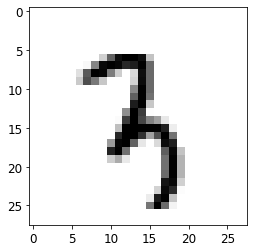

In [48]:
plt.imshow(mnist_batch[0].numpy().reshape(28, 28), cmap='binary')

### train in keras

In [49]:
datasets = tfds.load(name="mnist", batch_size=32, as_supervised=True)
mnist_train = datasets["train"].repeat().prefetch(1)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Lambda(lambda images: tf.cast(images, tf.float32)),
    keras.layers.Dense(10, activation="softmax")])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
model.fit(mnist_train, steps_per_epoch=60000 // 32, epochs=5)

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 32.2692 - accuracy: 0.8430
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 25.9615 - accuracy: 0.8695
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 24.6550 - accuracy: 0.8751
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 24.6945 - accuracy: 0.8752
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 23.6715 - accuracy: 0.8800
